In [153]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# ignore all FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [154]:
# indices en la primera columna
datos_procesados = pd.read_csv('merged_data.csv', sep=',', encoding='utf-8', index_col=0)
datos_procesados.head()

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),...,20-24 years old (%),10-14 years old (%),All ages (%),70+ years old (%),30-34 years old (%),15-19 years old (%),25-29 years old (%),50-69 years old (%),Age-standardized (%),15-49 years old (%)
0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404,...,4.417802,1.594676,3.218871,5.202803,5.799034,3.455708,5.175856,5.917752,4.071831,4.939766
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768,...,4.433524,1.588356,3.203468,5.192849,5.814828,3.451880,5.176729,5.927093,4.079531,4.902682
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644,...,4.453689,1.577980,3.156559,5.176872,5.829745,3.434982,5.160249,5.945656,4.088358,4.837097
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738,...,4.464517,1.577201,3.120655,5.167355,5.853060,3.420210,5.148767,5.966915,4.096190,4.813657
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260,...,4.462960,1.570846,3.082179,5.157549,5.852851,3.425222,5.148227,5.975907,4.099582,4.839340


In [155]:
qualitative_columns = ['Entity', 'Code'] 

In [156]:
#standar scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
datos_procesados_scaled = datos_procesados.copy()

# escalar todas las columnas, excepto entity y code
datos_procesados_scaled[datos_procesados.columns[2:]] = scaler.fit_transform(datos_procesados[datos_procesados.columns[2:]])
datos_procesados_scaled.head()

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),...,20-24 years old (%),10-14 years old (%),All ages (%),70+ years old (%),30-34 years old (%),15-19 years old (%),25-29 years old (%),50-69 years old (%),Age-standardized (%),15-49 years old (%)
0,Afghanistan,AFG,-1.671258,-1.134056,-0.116329,-0.857494,0.777161,1.912585,0.889303,-1.032458,...,0.626203,0.567329,-0.016087,-0.616407,1.696335,0.475179,1.267015,0.255039,0.889303,0.989162
1,Afghanistan,AFG,-1.547461,-1.139953,-0.115225,-0.873987,0.777964,1.929957,0.900767,-1.033196,...,0.640838,0.551351,-0.033929,-0.622994,1.711550,0.470660,1.267862,0.263986,0.900767,0.951029
2,Afghanistan,AFG,-1.423664,-1.144170,-0.114334,-0.890993,0.779170,1.951691,0.913909,-1.034500,...,0.659608,0.525123,-0.088267,-0.633567,1.725920,0.450710,1.251850,0.281766,0.913909,0.883590
3,Afghanistan,AFG,-1.299867,-1.146490,-0.113421,-0.906278,0.778954,1.976595,0.925569,-1.035551,...,0.669686,0.523154,-0.129859,-0.639865,1.748381,0.433271,1.240693,0.302129,0.925569,0.859487
4,Afghanistan,AFG,-1.176070,-1.146849,-0.112129,-0.918582,0.777684,2.000959,0.930618,-1.036106,...,0.668237,0.507089,-0.174428,-0.646354,1.748179,0.439187,1.240169,0.310742,0.930618,0.885896


In [157]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

datos_procesados_ecoding = pd.get_dummies(datos_procesados_scaled, columns=qualitative_columns)
datos_procesados_ecoding

,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence in males (%),Prevalence in females (%),...,Code_VCT,Code_VEN,Code_VIR,Code_VNM,Code_VUT,Code_WSM,Code_YEM,Code_ZAF,Code_ZMB,Code_ZWE
0,-1.671258,-1.134056,-0.116329,-0.857494,0.777161,1.912585,0.889303,-1.032458,1.276138,0.610139,...,False,False,False,False,False,False,False,False,False,False
1,-1.547461,-1.139953,-0.115225,-0.873987,0.777964,1.929957,0.900767,-1.033196,1.283324,0.619407,...,False,False,False,False,False,False,False,False,False,False
2,-1.423664,-1.144170,-0.114334,-0.890993,0.779170,1.951691,0.913909,-1.034500,1.292321,0.626737,...,False,False,False,False,False,False,False,False,False,False
3,-1.299867,-1.146490,-0.113421,-0.906278,0.778954,1.976595,0.925569,-1.035551,1.300507,0.634829,...,False,False,False,False,False,False,False,False,False,False
4,-1.176070,-1.146849,-0.112129,-0.918582,0.777684,2.000959,0.930618,-1.036106,1.304401,0.639532,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5483,1.176070,-1.250498,-0.663037,-0.757626,-0.755094,-0.151982,-0.515591,-0.054105,-0.048224,-0.815246,...,False,False,False,False,False,False,False,False,False,True
5484,1.299867,-1.242808,-0.659276,-0.752273,-0.751750,-0.146011,-0.497580,-0.054303,-0.032082,-0.799442,...,False,False,False,False,False,False,False,False,False,True
5485,1.423664,-1.231557,-0.654695,-0.743208,-0.747587,-0.139465,-0.474623,-0.055137,-0.012055,-0.778885,...,False,False,False,False,False,False,False,False,False,True
5486,1.547461,-1.216181,-0.649388,-0.730323,-0.742646,-0.138394,-0.447194,-0.056857,0.006350,-0.751223,...,False,False,False,False,False,False,False,False,False,True


### Clustering con K-means

In [158]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

In [139]:
max_clusters = 30

#aplicacion coeficiente de silueta
range_n_clusters = list (range(2,max_clusters))
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(datos_procesados_ecoding)
    silhouette_avg = silhouette_score(datos_procesados_ecoding, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg) 
    for cluster in range(0, n_clusters):
        cluster_silhouette_values = silhouette_samples(datos_procesados_ecoding, cluster_labels)
        print("    Cluster ", cluster, ":", np.mean(cluster_silhouette_values))

For n_clusters = 2 The average silhouette_score is : 0.2742362834901595
    Cluster  0 : 0.2742362834901595
    Cluster  1 : 0.2742362834901595
For n_clusters = 3 The average silhouette_score is : 0.24160408440099176
    Cluster  0 : 0.24160408440099176
    Cluster  1 : 0.24160408440099176
    Cluster  2 : 0.24160408440099176
For n_clusters = 4 The average silhouette_score is : 0.24339477405158066
    Cluster  0 : 0.24339477405158066
    Cluster  1 : 0.24339477405158066
    Cluster  2 : 0.24339477405158066
    Cluster  3 : 0.24339477405158066
For n_clusters = 5 The average silhouette_score is : 0.2484281272782584
    Cluster  0 : 0.2484281272782584
    Cluster  1 : 0.2484281272782584
    Cluster  2 : 0.2484281272782584
    Cluster  3 : 0.2484281272782584
    Cluster  4 : 0.2484281272782584
For n_clusters = 6 The average silhouette_score is : 0.1969005766841176
    Cluster  0 : 0.1969005766841176
    Cluster  1 : 0.1969005766841176
    Cluster  2 : 0.1969005766841176
    Cluster  3 : 0.

### Representación del codo para el k óptimo

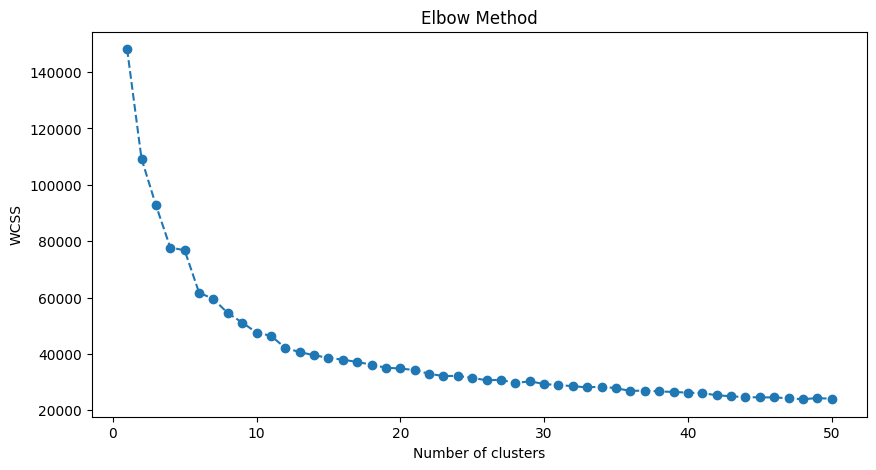

In [141]:
#representación del codo
from kneed import KneeLocator
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# Creamos una lista para almacenar los valores de WCSS

wcss = []

for i in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=i, **kmeans_kwargs)
    kmeans.fit(datos_procesados_ecoding)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1, max_clusters+1), wcss, marker='o', linestyle='--')

plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


### Clustering con K-means

In [159]:
from sklearn.cluster import KMeans

clusters = 10

kmeans = KMeans(n_clusters=clusters, random_state=0)
kmeans.fit(datos_procesados_ecoding)

clusters_identificados = kmeans.predict(datos_procesados_ecoding)

In [160]:
datos_con_clusters = datos_procesados_ecoding.copy()
datos_con_clusters['Cluster'] = clusters_identificados
datos_con_clusters.head()

,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence in males (%),Prevalence in females (%),...,Code_VEN,Code_VIR,Code_VNM,Code_VUT,Code_WSM,Code_YEM,Code_ZAF,Code_ZMB,Code_ZWE,Cluster
0,-1.671258,-1.134056,-0.116329,-0.857494,0.777161,1.912585,0.889303,-1.032458,1.276138,0.610139,...,False,False,False,False,False,False,False,False,False,8
1,-1.547461,-1.139953,-0.115225,-0.873987,0.777964,1.929957,0.900767,-1.033196,1.283324,0.619407,...,False,False,False,False,False,False,False,False,False,8
2,-1.423664,-1.144170,-0.114334,-0.890993,0.779170,1.951691,0.913909,-1.034500,1.292321,0.626737,...,False,False,False,False,False,False,False,False,False,8
3,-1.299867,-1.146490,-0.113421,-0.906278,0.778954,1.976595,0.925569,-1.035551,1.300507,0.634829,...,False,False,False,False,False,False,False,False,False,8
4,-1.176070,-1.146849,-0.112129,-0.918582,0.777684,2.000959,0.930618,-1.036106,1.304401,0.639532,...,False,False,False,False,False,False,False,False,False,8


In [164]:
# por cada columna, identificar qué cluster tiene los promedios más altos y cuál los más bajos

promedios_altos = {}
promedios_bajos = {}

for column in datos_con_clusters.columns:
    if column != 'Cluster' and column.startswith('Entity') == False and column.startswith('Code') == False:
        promedios = datos_con_clusters.groupby('Cluster')[column].mean()
        promedios_altos[column] = promedios.idxmax()
        promedios_bajos[column] = promedios.idxmin()

print(promedios_altos)
print(promedios_bajos)

for i in range(clusters):
    # por cada cluster imprimir en cuales fue el más alto y en cuales el mas bajo
    print(f'Cluster {i}:')
    print('Promedios altos:')
    for k, v in promedios_altos.items():
        if v == i:
            print(f'\t{k} - {v}')

    print('Promedios bajos:')
    for k, v in promedios_bajos.items():
        if v == i:
            print(f'\t{k} - {v}')

{'Year': 5, 'Schizophrenia (%)': 3, 'Bipolar disorder (%)': 7, 'Eating disorders (%)': 7, 'Anxiety disorders (%)': 7, 'Drug use disorders (%)': 3, 'Depression (%)': 3, 'Alcohol use disorders (%)': 5, 'Prevalence in males (%)': 3, 'Prevalence in females (%)': 3, 'Population_x': 4, 'Suicide rate (deaths per 100,000 individuals)': 3, 'Depressive disorder rates (number suffering per 100,000)': 3, 'Population_y': 4, 'Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)': 4, '20-24 years old (%)': 3, '10-14 years old (%)': 3, 'All ages (%)': 3, '70+ years old (%)': 5, '30-34 years old (%)': 3, '15-19 years old (%)': 3, '25-29 years old (%)': 3, '50-69 years old (%)': 1, 'Age-standardized (%)': 3, '15-49 years old (%)': 3}
{'Year': 1, 'Schizophrenia (%)': 0, 'Bipolar disorder (%)': 9, 'Eating disorders (%)': 0, 'Anxiety disorders (%)': 5, 'Drug use disorders (%)': 0, 'Depression (%)': 2, 'Alcohol use disorders (%)': 8, 'Prevalence in males 

## Notas
Se utilizaron los algoritmos de K-Means y Clustering Jerárquico para agrupar los datos procesados en los incisos anteriores. Se utilizó el método del codo para determinar el número óptimo de clusters. Se realizó un análisis de los clusters obtenidos con ambos algoritmos donde se obtuvieron los mismos resultados con estos. 

Las conclusiones y más detalles de cómo se interpretaron estos resultados se encuentran en el documento PDF entregado.